Lesson 6.1.4 Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#type(lats)
#type(lat_lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#type(coordinates)

Lesson 6.1.5 Generate Random World Cities

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #country = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee665a25356ae395168c7430eaefc45b


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee665a25356ae395168c7430eaefc45b&q=Boston


Lesson 6.2.4 Make a Request for Data to an API

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.status_code

200

In [11]:
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":85.93,"feels_like":84.45,"temp_min":82,"temp_max":91,"pressure":1014,"humidity":54},"visibility":16093,"wind":{"speed":13.87,"deg":120},"clouds":{"all":1},"dt":1592771469,"sys":{"type":1,"id":3486,"country":"US","sunrise":1592730456,"sunset":1592785477},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
type(city_weather)

requests.models.Response

In [13]:
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 85.93,
  'feels_like': 84.45,
  'temp_min': 82,
  'temp_max': 91,
  'pressure': 1014,
  'humidity': 54},
 'visibility': 16093,
 'wind': {'speed': 13.87, 'deg': 120},
 'clouds': {'all': 1},
 'dt': 1592771469,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592730456,
  'sunset': 1592785477},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

Handle Request Errors

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bstn"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


Lesson 6.2.5 Make a Request for Data to an API

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 85.93,
  'feels_like': 84.45,
  'temp_min': 82,
  'temp_max': 91,
  'pressure': 1014,
  'humidity': 54},
 'visibility': 16093,
 'wind': {'speed': 13.87, 'deg': 120},
 'clouds': {'all': 1},
 'dt': 1592771469,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592730456,
  'sunset': 1592785477},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

Lesson 6.2.5 Parse a Response from an API

In [17]:
# Get the JSON data.
boston_data = city_weather.json()
type(boston_data)

dict

In [18]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1592730456,
 'sunset': 1592785477}

In [19]:
boston_data['sys']['country']

'US'

In [20]:
# retrieve the date in the weather data
boston_data["dt"]

1592771469

In [21]:
# Get the latitude value from Boston JSON data
boston_data['coord']['lat']

42.36

In [22]:
# Get the Temperature Boston JSON data
#'coord': {'lon': -71.06, 'lat': 42.36}
boston_data['main']['temp_max']

91

In [23]:
# Get various stats from Boston JSON data
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 91 54 1 13.87


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 21, 20, 31, 9)

In [25]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-21 20:31:09'

Lesson 6.2.6 Get the City Weather Data


In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [27]:
type(cities)

list

In [28]:
len(cities)

604

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + "i"
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    # Handle API Request Errors with try-except Blocks
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"{city} not found! Skipping city ...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abu kamal
Processing Record 2 of Set 1 | egvekinot
Processing Record 3 of Set 1 | illoqqortoormiut
illoqqortoormiut not found! Skipping city ...
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | mys shmidta
mys shmidta not found! Skipping city ...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | oyama
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | hambantota
Processing Record 19 of Set 1 | cao bang
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rib

Processing Record 35 of Set 4 | utena
Processing Record 36 of Set 4 | the valley
Processing Record 37 of Set 4 | murupara
Processing Record 38 of Set 4 | vila franca do campo
Processing Record 39 of Set 4 | panzhihua
Processing Record 40 of Set 4 | linqiong
Processing Record 41 of Set 4 | abu dhabi
Processing Record 42 of Set 4 | rosetta
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | santa marta
Processing Record 46 of Set 4 | zhangye
Processing Record 47 of Set 4 | avera
Processing Record 48 of Set 4 | progreso
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | brae
Processing Record 1 of Set 5 | boende
Processing Record 2 of Set 5 | mosquera
Processing Record 3 of Set 5 | mitsamiouli
Processing Record 4 of Set 5 | yasinya
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | ostrovnoy
Processing Record 7 of Set 5 | thinadhoo
Processing Record 8 of Set 5 | honningsvag
Processin

Processing Record 22 of Set 8 | lolua
lolua not found! Skipping city ...
Processing Record 23 of Set 8 | skibbereen
Processing Record 24 of Set 8 | buraydah
Processing Record 25 of Set 8 | kjollefjord
Processing Record 26 of Set 8 | nishihara
Processing Record 27 of Set 8 | kavaratti
Processing Record 28 of Set 8 | yelizovo
Processing Record 29 of Set 8 | skara
Processing Record 30 of Set 8 | vanimo
Processing Record 31 of Set 8 | daru
Processing Record 32 of Set 8 | esperance
Processing Record 33 of Set 8 | chippewa falls
Processing Record 34 of Set 8 | svetlyy
Processing Record 35 of Set 8 | krasnoselkup
Processing Record 36 of Set 8 | nantucket
Processing Record 37 of Set 8 | karratha
Processing Record 38 of Set 8 | requena
Processing Record 39 of Set 8 | mount isa
Processing Record 40 of Set 8 | leh
Processing Record 41 of Set 8 | brigantine
Processing Record 42 of Set 8 | gwanda
Processing Record 43 of Set 8 | hirara
Processing Record 44 of Set 8 | alvorada
Processing Record 45 of

Processing Record 9 of Set 12 | manokwari
Processing Record 10 of Set 12 | primorsk
Processing Record 11 of Set 12 | jacksonville beach
Processing Record 12 of Set 12 | amuntai
Processing Record 13 of Set 12 | zyryanka
Processing Record 14 of Set 12 | gander
Processing Record 15 of Set 12 | blythe
Processing Record 16 of Set 12 | tibiri
Processing Record 17 of Set 12 | oras
Processing Record 18 of Set 12 | huarmey
Processing Record 19 of Set 12 | gillette
Processing Record 20 of Set 12 | batagay
Processing Record 21 of Set 12 | dhidhdhoo
Processing Record 22 of Set 12 | ginir
Processing Record 23 of Set 12 | aginskoye
Processing Record 24 of Set 12 | calvia
Processing Record 25 of Set 12 | claresholm
Processing Record 26 of Set 12 | mount gambier
Processing Record 27 of Set 12 | richards bay
Processing Record 28 of Set 12 | vidim
Processing Record 29 of Set 12 | saint-pierre
Processing Record 30 of Set 12 | nemuro
Processing Record 31 of Set 12 | nerchinskiy zavod
Processing Record 32 

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abu Kamal,34.45,40.92,82.13,31,0,9.57,SY,2020-06-21 20:32:20
1,Egvekinot,66.32,-179.17,60.66,41,21,3.83,RU,2020-06-21 20:32:20
2,Saldanha,-33.01,17.94,55.40,93,1,3.36,ZA,2020-06-21 20:32:21
3,Hilo,19.73,-155.09,78.80,65,90,4.70,US,2020-06-21 20:30:06
4,Pevek,69.70,170.31,45.28,71,6,5.95,RU,2020-06-21 20:32:21
5,Albany,42.60,-73.97,93.00,39,62,3.58,US,2020-06-21 20:29:18
6,Kapaa,22.08,-159.32,82.40,65,40,12.75,US,2020-06-21 20:32:22
7,Ponta Do Sol,32.67,-17.10,71.60,68,20,16.11,PT,2020-06-21 20:32:22
8,Kodiak,57.79,-152.41,51.80,87,90,11.41,US,2020-06-21 20:32:22
9,Nikolskoye,59.70,30.79,60.80,55,0,6.71,RU,2020-06-21 20:32:22


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Abu Kamal,SY,2020-06-21 20:32:20,34.45,40.92,82.13,31,0,9.57
1,Egvekinot,RU,2020-06-21 20:32:20,66.32,-179.17,60.66,41,21,3.83
2,Saldanha,ZA,2020-06-21 20:32:21,-33.01,17.94,55.40,93,1,3.36
3,Hilo,US,2020-06-21 20:30:06,19.73,-155.09,78.80,65,90,4.70
4,Pevek,RU,2020-06-21 20:32:21,69.70,170.31,45.28,71,6,5.95
5,Albany,US,2020-06-21 20:29:18,42.60,-73.97,93.00,39,62,3.58
6,Kapaa,US,2020-06-21 20:32:22,22.08,-159.32,82.40,65,40,12.75
7,Ponta Do Sol,PT,2020-06-21 20:32:22,32.67,-17.10,71.60,68,20,16.11
8,Kodiak,US,2020-06-21 20:32:22,57.79,-152.41,51.80,87,90,11.41
9,Nikolskoye,RU,2020-06-21 20:32:22,59.70,30.79,60.80,55,0,6.71


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Section 6.3.1 Plot Latitude vs. Temperature

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

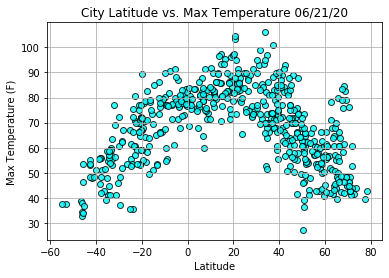

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            color="cyan", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1-Latitude.png")

# Show plot.
plt.show()

Section 6.3.2 Plot Latitude vs. Humidity

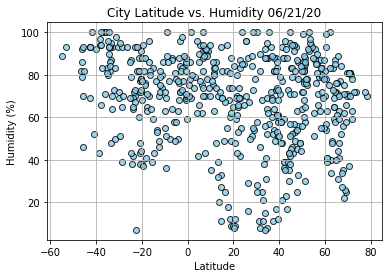

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            color="skyblue", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2-Humidity.png")

# Show plot.
plt.show()

Section 6.3.3 Plot Latitude vs. Cloudiness

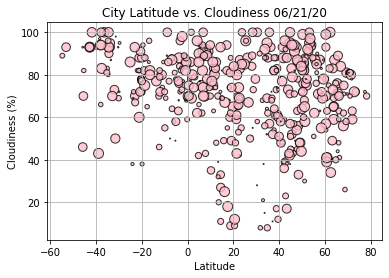

In [43]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            cloudiness,
            color="pink", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3-Cloudiness.png")

# Show plot.
plt.show()

Section 6.3.4 Plot Latitude vs. Wind Speed

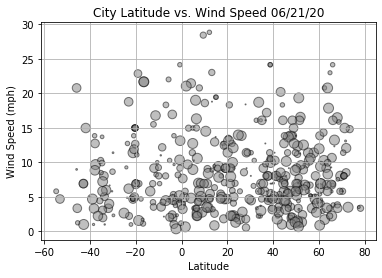

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            cloudiness,
            color="grey", edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4-WindSpeed.png")

# Show plot.
plt.show()